# TAREA 3

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [56]:
#Leer y guardar csv

b0 = pd.read_csv('/content/BillieEilish.csv')
b1 = pd.read_csv('/content/CharliePuth.csv')
b2 = pd.read_csv('/content/ColdPlay.csv')
b3 = pd.read_csv('/content/Drake.csv')
b4 = pd.read_csv('/content/EdSheeran.csv')
b5 = pd.read_csv('/content/Eminem.csv')
b6 = pd.read_csv('/content/JustinBieber.csv')
b7 = pd.read_csv('/content/Khalid.csv')
b8 = pd.read_csv('/content/Rihanna.csv')
b9 = pd.read_csv('/content/TaylorSwift.csv')

In [57]:
df = pd.concat([b0,b1,b2,b3,b4,b5,b6,b7,b8,b9], axis = 0, ignore_index = True)

In [58]:
df

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Billie Eilish,​when the party’s over,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? (Japa...",2018.0,2018-10-17,don't you know i'm no good for you i've learne...
1,1,Billie Eilish,​everything i wanted,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? (Targ...",2019.0,2019-11-13,i had a dream i got everything i wanted not wh...
2,2,Billie Eilish,​bad guy,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? (Japa...",2019.0,2019-03-29,white shirt now red my bloody nose sleepin' yo...
3,3,Billie Eilish,​idontwannabeyouanymore,dont smile at me,2017.0,2017-07-21,don't be that way fall apart twice a day i jus...
4,4,Billie Eilish,​bury a friend,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO? (Japa...",2019.0,2019-01-30,mehki raine billie billie eilish what do you...
...,...,...,...,...,...,...,...
3138,474,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,Live From Clear Channel Stripped 2008,2008.0,2008-06-28,drew looks at me i fake a smile so he won't se...
3139,475,Taylor Swift,Evermore [Forward],NaN,2020.0,2020-12-11,to put it plainly we just couldnt stop writing...
3140,476,Taylor Swift,Welcome Back Grunwald,NaN,NaN,NaN,turn wycd on you're on your grunwald back from...
3141,477,Taylor Swift,Tolerate it (Polskie Tłumaczenie),NaN,2020.0,2020-12-11,zwrotka siedzę i patrzę jak czytasz z głową p...


In [59]:
df = df.drop(['Unnamed: 0', 'Album', 'Year', 'Date'], axis = 1)
df = df.dropna()
df = df.drop([3141], axis=0)
df = df.reset_index(drop=True)

In [60]:
df

,Artist,Title,Lyric
0,Billie Eilish,​when the party’s over,don't you know i'm no good for you i've learne...
1,Billie Eilish,​everything i wanted,i had a dream i got everything i wanted not wh...
2,Billie Eilish,​bad guy,white shirt now red my bloody nose sleepin' yo...
3,Billie Eilish,​idontwannabeyouanymore,don't be that way fall apart twice a day i jus...
4,Billie Eilish,​bury a friend,mehki raine billie billie eilish what do you...
...,...,...,...
3111,Taylor Swift,Should’ve Said No (Live from Clear Channel Str...,it's strange to think the songs we used to sin...
3112,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew looks at me i fake a smile so he won't se...
3113,Taylor Swift,Evermore [Forward],to put it plainly we just couldnt stop writing...
3114,Taylor Swift,Welcome Back Grunwald,turn wycd on you're on your grunwald back from...


In [61]:
def get_subdf(letra, artista, cancion):
  frase = letra.split("  ")
  df_aux=pd.DataFrame(frase, columns = ['Lyrics'])
  df_aux['Artist'] = artista
  df_aux['Title'] = cancion
  return df_aux

In [62]:
df2 = pd.DataFrame()

for j in range(len(df)):
  aux = df.iloc[j,2]
  artist = df.iloc[j,0]
  song = df.iloc[j,1]
  subdf = get_subdf(aux, artist, song)
  df2 = pd.concat([df2,subdf], axis = 0, ignore_index = True)

In [63]:
df2

,Lyrics,Artist,Title
0,don't you know i'm no good for you i've learne...,Billie Eilish,​when the party’s over
1,quiet when i'm coming home and i'm on my own ...,Billie Eilish,​when the party’s over
2,don't you know too much already i'll only hur...,Billie Eilish,​when the party’s over
3,quiet when i'm coming home and i'm on my own ...,Billie Eilish,​when the party’s over
4,but nothin' is better sometimes once we've bo...,Billie Eilish,​when the party’s over
...,...,...,...
25829,turn wycd on you're on your grunwald back from...,Taylor Swift,Welcome Back Grunwald
25830,he's here with doctor don i heard they dropped...,Taylor Swift,Welcome Back Grunwald
25831,he caught an anaconda ate some piranhas that's...,Taylor Swift,Welcome Back Grunwald
25832,trying just like they say just taking the step...,Taylor Swift,Find you


In [64]:
#conteo de palabras
df2['word_count'] = df2['Lyrics'].apply(lambda x: len(str(x).split()))

#conteo de caracteres
df2['char_count'] = df2['Lyrics'].apply(lambda x: len(str(x)))

#densidad de palabras
df2['word_density'] = df2['char_count'] / df2['word_count']

In [65]:
df2

,Lyrics,Artist,Title,word_count,char_count,word_density
0,don't you know i'm no good for you i've learne...,Billie Eilish,​when the party’s over,29,145,5.000000
1,quiet when i'm coming home and i'm on my own ...,Billie Eilish,​when the party’s over,36,153,4.250000
2,don't you know too much already i'll only hur...,Billie Eilish,​when the party’s over,32,152,4.750000
3,quiet when i'm coming home and i'm on my own ...,Billie Eilish,​when the party’s over,38,162,4.263158
4,but nothin' is better sometimes once we've bo...,Billie Eilish,​when the party’s over,21,105,5.000000
...,...,...,...,...,...,...
25829,turn wycd on you're on your grunwald back from...,Taylor Swift,Welcome Back Grunwald,14,68,4.857143
25830,he's here with doctor don i heard they dropped...,Taylor Swift,Welcome Back Grunwald,17,79,4.647059
25831,he caught an anaconda ate some piranhas that's...,Taylor Swift,Welcome Back Grunwald,29,166,5.724138
25832,trying just like they say just taking the step...,Taylor Swift,Find you,75,353,4.706667


In [66]:
df.Artist.unique()

array(['Billie Eilish', 'Charlie Puth', 'Coldplay', 'Drake', 'Ed Sheeran',
       'Eminem', 'Justin Bieber', 'Khalid', 'Rihanna', 'Taylor Swift'],
      dtype=object)

In [67]:
df_0 = df2[df2['Artist'] == 'Billie Eilish']
df_1 = df2[df2['Artist'] == 'Charlie Puth']
df_2 = df2[df2['Artist'] == 'Coldplay']
df_3 = df2[df2['Artist'] == 'Drake']
df_4 = df2[df2['Artist'] == 'Ed Sheeran']
df_5 = df2[df2['Artist'] == 'Eminem']
df_6 = df2[df2['Artist'] == 'Justin Bieber']
df_7 = df2[df2['Artist'] == 'Khalid']
df_8 = df2[df2['Artist'] == 'Rihanna']
df_9 = df2[df2['Artist'] == 'Taylor Swift']

In [68]:
data = df2.drop(columns= ['Lyrics', 'Title']).groupby(['Artist']).mean()
data

,word_count,char_count,word_density
Artist,,,
Billie Eilish,31.298378,152.480000,4.960425
Charlie Puth,34.486212,166.523948,4.888259
Coldplay,26.787814,130.653174,5.037556
Drake,64.903543,317.682048,5.009653
Ed Sheeran,44.630775,214.032543,4.802636
Eminem,76.860044,385.649448,5.153189
Justin Bieber,38.872114,187.159858,4.967670
Khalid,45.503268,224.854031,5.071531
Rihanna,40.336273,192.679713,4.997892


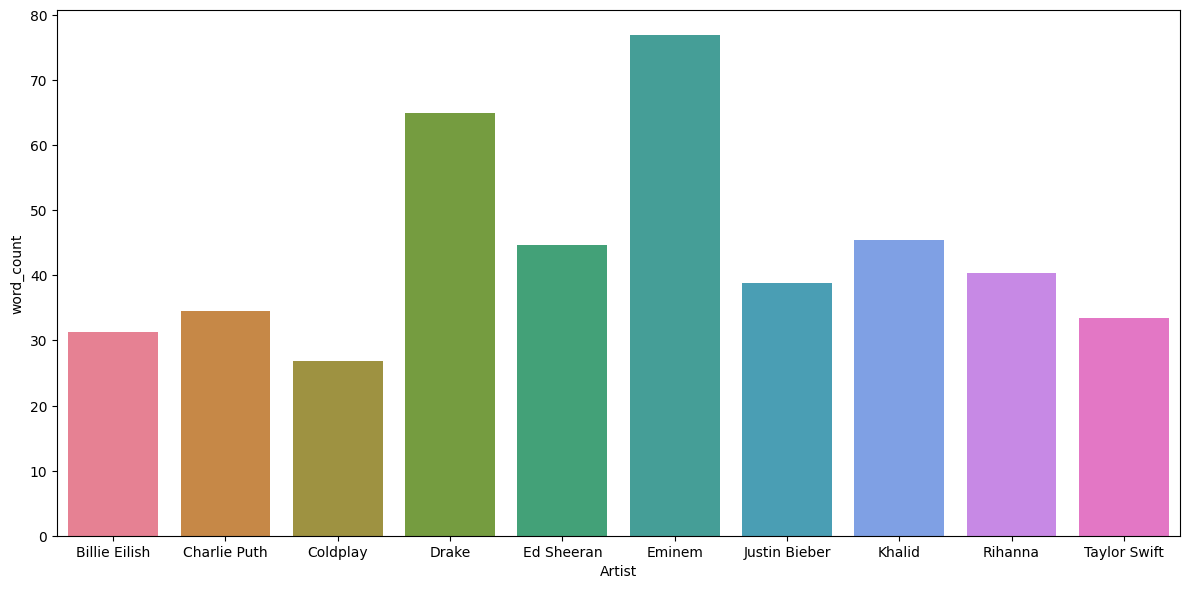

In [69]:
### barras conjuntas word
plt.figure(figsize=(12, 6))
sns.set_palette("mako")
sns.barplot(data=data, x="Artist", y="word_count", hue= 'Artist')
plt.xlabel('Artist')
plt.ylabel('word_count')
plt.xticks(rotation=0)
#plt.legend(loc=0)
plt.tight_layout()
plt.show()

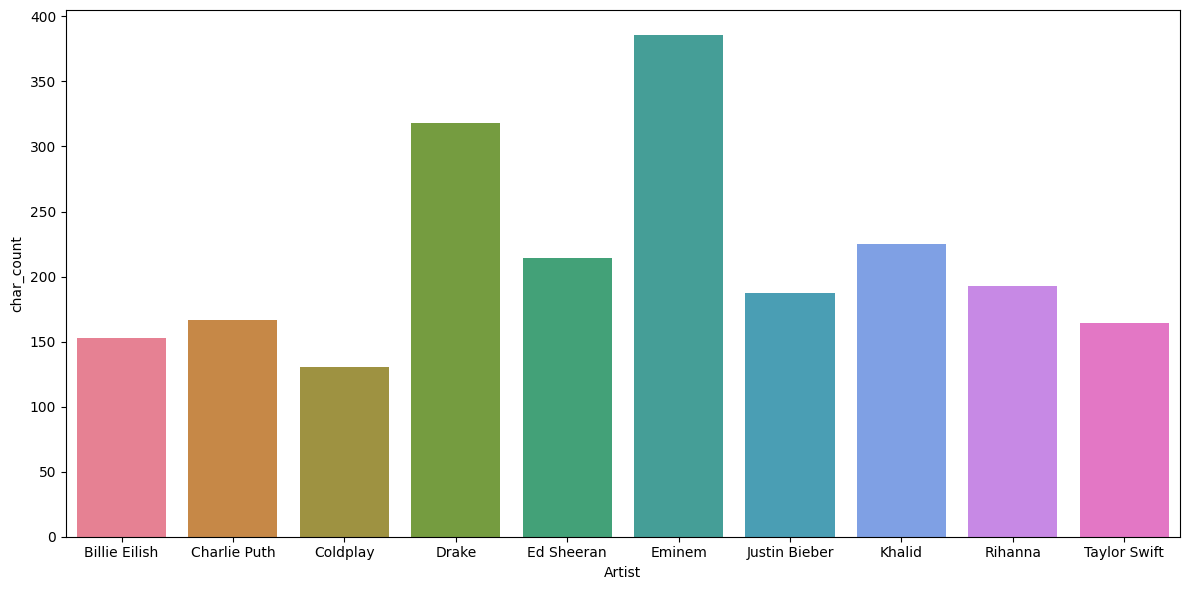

In [70]:
### barras conjuntas
plt.figure(figsize=(12, 6))
sns.set_palette("mako")
sns.barplot(data=data, x="Artist", y="char_count", hue= 'Artist')
plt.xlabel('Artist')
plt.ylabel('char_count')
plt.xticks(rotation=0)
#plt.legend(loc=0)
plt.tight_layout()
plt.show()

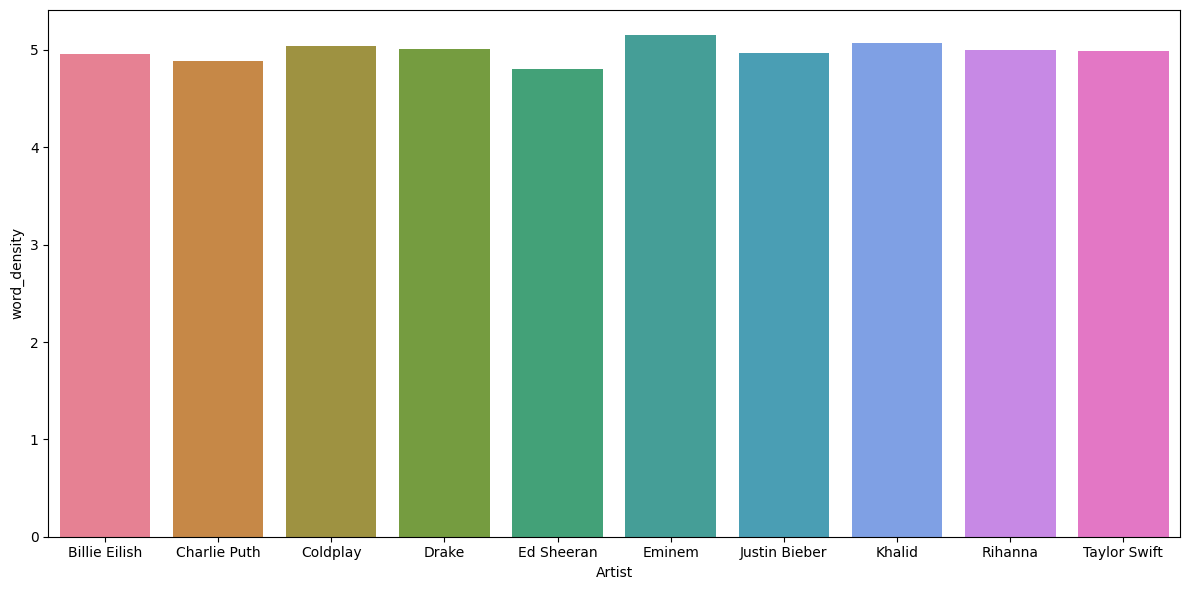

In [71]:
### barras conjuntas
plt.figure(figsize=(12, 6))
sns.set_palette("mako")
sns.barplot(data=data, x="Artist", y="word_density", hue= 'Artist')
plt.xlabel('Artist')
plt.ylabel('word_density')
plt.xticks(rotation=0)
#plt.legend(loc=0)
plt.tight_layout()
plt.show()

In [72]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [73]:
text = list(df2['Lyrics'])

In [74]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

corpus = []

In [75]:
for i in tqdm(range(len(text))):
    r = re.sub('[^a-zA-Z]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)

100%|██████████| 25834/25834 [02:56<00:00, 146.63it/s]


In [76]:
df2['text_clean'] = corpus
df2.head()

,Lyrics,Artist,Title,word_count,char_count,word_density,text_clean
0,don't you know i'm no good for you i've learne...,Billie Eilish,​when the party’s over,29,145,5.000000,know good learned lose afford tore shirt stop ...
1,quiet when i'm coming home and i'm on my own ...,Billie Eilish,​when the party’s over,36,153,4.250000,quiet coming home could lie say like like like...
2,don't you know too much already i'll only hur...,Billie Eilish,​when the party’s over,32,152,4.750000,know much already hurt let call friend keep cl...
3,quiet when i'm coming home and i'm on my own ...,Billie Eilish,​when the party’s over,38,162,4.263158,quiet coming home could lie say like like like...
4,but nothin' is better sometimes once we've bo...,Billie Eilish,​when the party’s over,21,105,5.000000,nothin better sometimes said goodbye let let g...


In [77]:
## entrenamiento y prueba

In [78]:
def get_train_test(dftot, test_size):
  df_0 = dftot[dftot['Artist'] == 'Billie Eilish']
  df_1 = dftot[dftot['Artist'] == 'Charlie Puth']
  df_2 = dftot[dftot['Artist'] == 'Coldplay']
  df_3 = dftot[dftot['Artist'] == 'Drake']
  df_4 = dftot[dftot['Artist'] == 'Ed Sheeran']
  df_5 = dftot[dftot['Artist'] == 'Eminem']
  df_6 = dftot[dftot['Artist'] == 'Justin Bieber']
  df_7 = dftot[dftot['Artist'] == 'Khalid']
  df_8 = dftot[dftot['Artist'] == 'Rihanna']
  df_9 = dftot[dftot['Artist'] == 'Taylor Swift']
  x0 = df_0['text_clean']
  x1 = df_1['text_clean']
  x2 = df_2['text_clean']
  x3 = df_3['text_clean']
  x4 = df_4['text_clean']
  x5 = df_5['text_clean']
  x6 = df_6['text_clean']
  x7 = df_7['text_clean']
  x8 = df_8['text_clean']
  x9 = df_9['text_clean']
  x0_train, x0_test, y0_train, y0_test = train_test_split(x0, df_0['Artist'], test_size=test_size)
  x1_train, x1_test, y1_train, y1_test = train_test_split(x1, df_1['Artist'], test_size=test_size)
  x2_train, x2_test, y2_train, y2_test = train_test_split(x2, df_2['Artist'], test_size=test_size)
  x3_train, x3_test, y3_train, y3_test = train_test_split(x3, df_3['Artist'], test_size=test_size)
  x4_train, x4_test, y4_train, y4_test = train_test_split(x4, df_4['Artist'], test_size=test_size)
  x5_train, x5_test, y5_train, y5_test = train_test_split(x5, df_5['Artist'], test_size=test_size)
  x6_train, x6_test, y6_train, y6_test = train_test_split(x6, df_6['Artist'], test_size=test_size)
  x7_train, x7_test, y7_train, y7_test = train_test_split(x7, df_7['Artist'], test_size=test_size)
  x8_train, x8_test, y8_train, y8_test = train_test_split(x8, df_8['Artist'], test_size=test_size)
  x9_train, x9_test, y9_train, y9_test = train_test_split(x9, df_9['Artist'], test_size=test_size)
  X_test = pd.concat([x0_test, x1_test, x2_test, x3_test, x4_test,
                      x5_test, x6_test, x7_test,x8_test,x9_test], axis = 0, ignore_index = True)
  Y_test = pd.concat([y0_test, y1_test, y2_test, y3_test, y4_test,
                      y5_test, y6_test, y7_test,y8_test,y9_test], axis = 0, ignore_index = True)
  Y_train = pd.concat([y0_train, y1_train, y2_train, y3_train, y4_train,
                      y5_train, y6_train, y7_train,y8_train,y9_train], axis = 0, ignore_index = True)
  X_train = pd.concat([x0_train, x1_train, x2_train, x3_train, x4_train,
                      x5_train, x6_train, x7_train,x8_train,x9_train], axis = 0, ignore_index = True)
  return X_train, X_test, Y_train, Y_test

In [79]:
#vectorizacion

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
#modelos

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay

In [84]:
import multiprocessing
from timeit import default_timer as timer

In [85]:
#se evaluan diferentes modelos
def get_mode(xtrain, xtest, reg_mode = 'conteo'):
    match reg_mode:
        case 'conteo':
            count_vect = CountVectorizer(analyzer='word')
            count_vect.fit(xtrain)
            xtrain_mode =  count_vect.transform(xtrain)
            xtest_mode =  count_vect.transform(xtest)
        case 'palabra':
            tfidf_vect = TfidfVectorizer(analyzer='word')
            xtrain_mode =  tfidf_vect.fit_transform(xtrain)
            xtest_mode =  tfidf_vect.transform(xtest)
        case 'ngramas':
            tfidf_vect_ngram = TfidfVectorizer(analyzer='word', ngram_range=(2,3))
            xtrain_mode =  tfidf_vect_ngram.fit_transform(xtrain)
            xtest_mode =  tfidf_vect_ngram.transform(xtest)
        case 'caracteres':
            tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char')
            xtrain_mode =  tfidf_vect_ngram_chars.fit_transform(xtrain)
            xtest_mode =  tfidf_vect_ngram_chars.transform(xtest)
    return xtrain_mode, xtest_mode

In [86]:
df2

,Lyrics,Artist,Title,word_count,char_count,word_density,text_clean
0,don't you know i'm no good for you i've learne...,Billie Eilish,​when the party’s over,29,145,5.000000,know good learned lose afford tore shirt stop ...
1,quiet when i'm coming home and i'm on my own ...,Billie Eilish,​when the party’s over,36,153,4.250000,quiet coming home could lie say like like like...
2,don't you know too much already i'll only hur...,Billie Eilish,​when the party’s over,32,152,4.750000,know much already hurt let call friend keep cl...
3,quiet when i'm coming home and i'm on my own ...,Billie Eilish,​when the party’s over,38,162,4.263158,quiet coming home could lie say like like like...
4,but nothin' is better sometimes once we've bo...,Billie Eilish,​when the party’s over,21,105,5.000000,nothin better sometimes said goodbye let let g...
...,...,...,...,...,...,...,...
25829,turn wycd on you're on your grunwald back from...,Taylor Swift,Welcome Back Grunwald,14,68,4.857143,turn wycd grunwald back amazon ah huh huh
25830,he's here with doctor don i heard they dropped...,Taylor Swift,Welcome Back Grunwald,17,79,4.647059,doctor heard dropped amazon ah huh huh
25831,he caught an anaconda ate some piranhas that's...,Taylor Swift,Welcome Back Grunwald,29,166,5.724138,caught anaconda ate piranha kinda disgusting w...
25832,trying just like they say just taking the step...,Taylor Swift,Find you,75,353,4.706667,trying like say taking step love piece cake th...


In [87]:
testsz = [0.3, 0.2]

In [88]:
# se evaluan todos los modelos 3 veces usando conteo y 2 test sizes
matrices ={}
modes_ed = ['conteo', 'palabra', 'caracteres']
n_jobs = multiprocessing.cpu_count() // 2
results_ed = {
        'mode' : [],
        'value' : [],
        'time' : [],
        'size' : []
    }
for i in tqdm(range(2)):
  for j in testsz:
      xtrain, xtest, ytrain, ytest = get_train_test(df2, j)

      for m in modes_ed:
          conty = 0
          xtrain_mode, xtest_mode = get_mode(xtrain, xtest, m)
          start = timer()
          model = LogisticRegression()
          model.fit(xtrain_mode, ytrain)
          end = timer()
          y_pred = model.predict(xtest_mode)
          results_ed['mode'].append(m)

          cf = metrics.confusion_matrix(ytest, y_pred)
          df_confusion = pd.DataFrame(cf,index=df2.Artist.unique(), columns=df2.Artist.unique())
          id = str(m)+'-'+str(j) + '-'+str(i)
          matrices[id] = df_confusion

          dfpred = pd.DataFrame()
          dfpred['y_pred'] = y_pred
          dfpred['y_test'] = ytest
          dfpred['positive'] = 0
          for l in range(len(y_pred)):
              if dfpred.iloc[l,0] == dfpred.iloc[l,1]:
                dfpred.iloc[l,2] = 1
                conty = conty+1
          print(conty)
          results_ed['value'].append( conty/len(y_pred))
          results_ed['time'].append(end - start)
          results_ed['size'].append(j)


df_results_ed = pd.DataFrame(results_ed)
df_results_ed = df_results_ed.sort_values('value')

  0%|          | 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5785


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5408


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2320


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3944


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3713


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 50%|█████     | 1/2 [00:58<00:58, 58.19s/it]

1539


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5826


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5431


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2393


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3890


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3662


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|██████████| 2/2 [01:53<00:00, 56.96s/it]

1548


In [ ]:
matrices.keys()

In [99]:
matrices['caracteres-0.3-0']

,Billie Eilish,Charlie Puth,Coldplay,Drake,Ed Sheeran,Eminem,Justin Bieber,Khalid,Rihanna,Taylor Swift
Billie Eilish,0,0,6,22,11,88,18,0,32,101
Charlie Puth,0,0,6,15,4,61,6,0,42,73
Coldplay,0,0,49,32,20,176,37,0,106,285
Drake,0,0,14,198,14,345,26,0,138,273
Ed Sheeran,0,0,17,61,76,226,20,0,92,255
Eminem,1,1,10,72,19,816,31,0,133,276
Justin Bieber,0,0,10,49,27,184,141,0,157,277
Khalid,0,0,5,25,6,22,1,0,25,54
Rihanna,0,0,23,82,52,284,49,0,344,255
Taylor Swift,0,0,27,88,34,341,60,0,132,696


In [102]:
df_results_ed

,mode,value,time,size
5,caracteres,0.297737,1.137539,0.2
2,caracteres,0.299200,1.003986,0.3
11,caracteres,0.299478,1.161504,0.2
8,caracteres,0.308615,1.031422,0.3
1,palabra,0.697446,12.305024,0.3
7,palabra,0.700413,10.959405,0.3
10,palabra,0.708454,11.407038,0.2
4,palabra,0.718321,11.622337,0.2
0,conteo,0.746067,8.575635,0.3
6,conteo,0.751354,10.521876,0.3


In [ ]:
#se usa conteo con 0.2

In [103]:
xtrain, xtest, ytrain, ytest = get_train_test(df2, 0.2)
xtrain_mode, xtest_mode = get_mode(xtrain, xtest, 'conteo')

In [104]:
lr = LogisticRegression()
lr.fit(xtrain_mode, ytrain)

# generate predictions
predictions = lr.predict(xtest_mode)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
cf = metrics.confusion_matrix(ytest, predictions)
df_confusion = pd.DataFrame(cf, index=df2.Artist.unique(), columns=df2.Artist.unique())
df_confusion

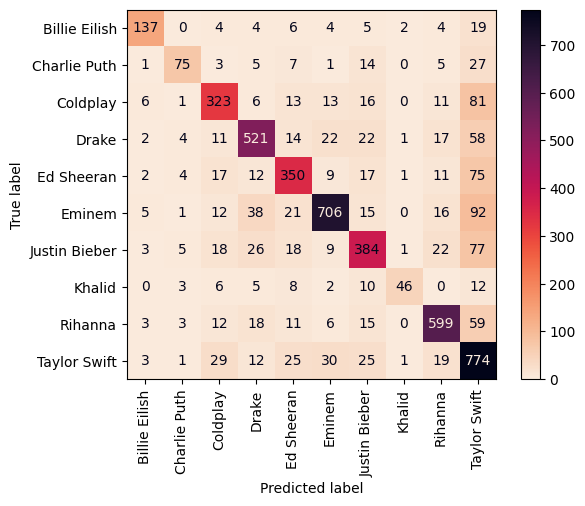

In [98]:
disp = ConfusionMatrixDisplay(cf,display_labels= df2.Artist.unique())
disp.plot(xticks_rotation='vertical', cmap='rocket_r')